In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#Importing our own functions
import standardize_datasets
from utils import confusion_matrix_improved

In [2]:
#Standardize datasets
guardian, onion = standardize_datasets.standardize_without_theme()

In [3]:
def merge(df1, df2):
    df1['label'] = 1
    df2['label'] = 0
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df

df = merge(guardian, onion)

In [4]:
def tfidf(X_train, X_test):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    return tfidf_train, tfidf_test

In [5]:
def classification_model(tfidf_train, y_train):
    #Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(tfidf_train, y_train)
    return logreg

In [14]:
def knc_model(tfidf_train, y_train):
    #KMeans
    knc = KNeighborsClassifier(n_neighbors=3)
    knc.fit(tfidf_train, y_train)
    return knc

In [31]:
def performance(model, tfidf_test, y_test):
    y_pred = model.predict(tfidf_test)
    confusion_matrix_improved(y_test, y_pred)
    plt.title(f'Confusion matrix. Accuracy: {accuracy_score(y_test, y_pred):.3f}')

In [8]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['article'], df['label'], test_size=0.2, random_state=42)

In [9]:
#TF-IDF
tfidf_train, tfidf_test = tfidf(X_train, X_test)

In [15]:
model_logreg = classification_model(tfidf_train, y_train)
model_knc = knc_model(tfidf_train, y_train)

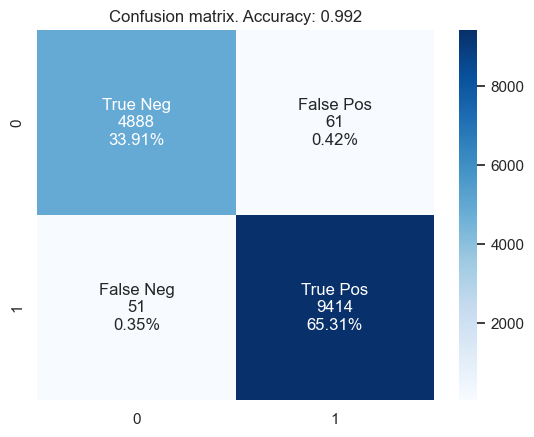

In [34]:
performance(model_logreg, tfidf_test, y_test)
#performance(model_knc, tfidf_test, y_test) #Extremely slow